# AutoGrad
---


In [1]:
from AutoGrad.engine import Scalar
from AutoGrad.utils import draw_dot

print("Imports Completed")

Imports Completed


# `Scalar`
This is the main data-type that is used to to implement the computational graphs.

`var = Scalar(data: float, _children= (Scalar1, Scalar2) or (), _op='Operation', label = 'Name')`

Except `data` all the attributes are optional, though passing a `label` will make the code more readable.

In [2]:
a = Scalar(2.0, label='a')
b = Scalar(3.0, label='b')
a, b

(Scalar(a = 2.0 | Grad = 0.0), Scalar(b = 3.0 | Grad = 0.0))

`Scalar`s support arithmetic operations, such as addition, multiplication and exponentiation.

In [3]:
a + b, a - b, a + 2, 2 - b 

(Scalar(a+b = 5.0 | Grad = 0.0),
 Scalar(a+b*Const(-1) = -1.0 | Grad = 0.0),
 Scalar(a+Const(2) = 4.0 | Grad = 0.0),
 Scalar(b*Const(-1)+Const(2) = -1.0 | Grad = 0.0))

In [4]:
a * 2, 2 * a, a / 2, 2 / a

(Scalar(a*Const(2) = 4.0 | Grad = 0.0),
 Scalar(a*Const(2) = 4.0 | Grad = 0.0),
 Scalar(a*Const(0.5) = 1.0 | Grad = 0.0),
 Scalar(*Const(2) = 1.0 | Grad = 0.0))

Some other trancendental functions implemented are

In [5]:
a.log(), a.exp(), b.tanh()

(Scalar(log(a) = 0.6931471805599453 | Grad = 0.0),
 Scalar(exp(a) = 7.38905609893065 | Grad = 0.0),
 Scalar(tanh(b) = 0.9950547536867305 | Grad = 0.0))

# DAG
A **Directed Graph** is created, when operations are performed.

This can be visualized using the `AutoGrad.utils.draw_dot(Scalar)` function.

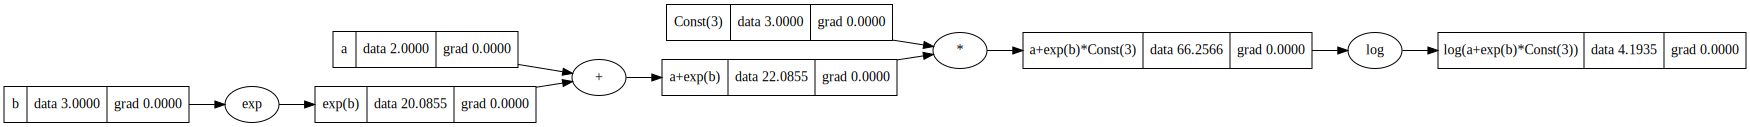

In [6]:
c = a + b.exp()
d = c * 3
e = d.log()
draw_dot(e)

The `Scalar.backward()` operation performes *BackPropagation* on the *computational graph* starting from that `Scalar`

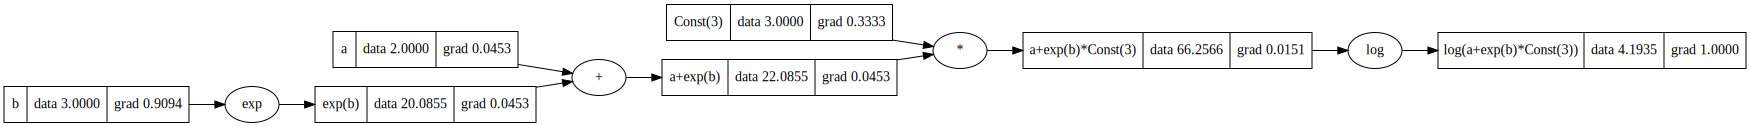

In [7]:
e.backward()
draw_dot(e)